# Proyecto Wallapop

## 1. Importar bibliotecas y cargar el conjunto de datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Proyecto ironhack/files/spain_dataset.csv')
df

,listings
0,"{'id': 'mzn205xy1kzn', 'type': 'cars_search_ca..."
1,"{'id': 'p614qm1lr265', 'type': 'cars_search_ca..."
2,"{'id': 'pzp2gegk1mj3', 'type': 'cars_search_ca..."
3,"{'id': 'vjrq4ppo59zk', 'type': 'cars_search_ca..."
4,"{'id': 'p6145dgne765', 'type': 'cars_search_ca..."
...,...
69999,"{'id': 'vjrq1y237wzk', 'type': 'cars_search_ca..."
70000,"{'id': 'e658p49m5m6o', 'type': 'cars_search_ca..."
70001,"{'id': '8j34574d7y69', 'type': 'cars_search_ca..."
70002,"{'id': 'wzy4x2qk95z5', 'type': 'cars_search_ca..."


In [3]:
#df = pd.read_csv('D:/Proyecto ironhack/files/datos_coordenadas/datos_combinados.csv')
#df

In [3]:
# Convertir la columna 'listings' de string a diccionario
df['listings'] = df['listings'].apply(ast.literal_eval)

# Normalizar los datos JSON para expandir los diccionarios en columnas
df = pd.json_normalize(df['listings'])

In [4]:
# Ahora voy ha identificar los datos del DataFrame usando varios codigos.
df.head()

,id,type,content_id,title,storytelling,distance,user_id,kind,flag_pending,flag_sold,...,engine,gearbox,horsepower,favorited,creation_date,modification_date,supports_shipping,location.city,location.postal_code,location.country_code
0,mzn205xy1kzn,cars_search_cars,mzn205xy1kzn,Ford Kuga 1.5 TDCI 120 CV 4x2 A-S-S TITANIUM 2018,"Vehículo en muy buen estado, un único dueño, ...",14.0,08z88grd38z3,normal,False,False,...,Diésel,manual,120.0,False,2024-07-31T18:27:38.994+00:00,2024-08-01T18:28:57.443+00:00,False,Chiclana de la Frontera,11130,ES
1,p614qm1lr265,cars_search_cars,p614qm1lr265,Autocaravana Mobilvetta Icaro s12,Vendo autocaravana Mobilvetta Icaro S12 alta g...,1.0,9nz089kgvv6o,normal,False,False,...,Diésel,manual,146.0,False,2024-07-23T12:40:18.936+00:00,2024-07-27T18:13:31.312+00:00,False,Fuente del Gallo,11149,ES
2,pzp2gegk1mj3,cars_search_cars,pzp2gegk1mj3,Peugeot 308 2019,🔸Datos del coche:\n\nPrecio:12500\nMarca: PEUG...,14.0,08z8rvd0m8j3,normal,False,False,...,Diésel,manual,100.0,False,2024-07-01T17:47:27.095+00:00,2024-08-01T15:36:22.124+00:00,False,Chiclana de la Frontera,11130,ES
3,vjrq4ppo59zk,cars_search_cars,vjrq4ppo59zk,Renault Clio 2018,🔸Datos del coche:\n\nPrecio:10200\nMarca: Rena...,14.0,08z8rvd0m8j3,normal,False,False,...,Diésel,manual,75.0,False,2024-05-29T16:16:37.649+00:00,2024-08-01T15:35:42.648+00:00,False,Chiclana de la Frontera,11130,ES
4,p6145dgne765,cars_search_cars,p6145dgne765,Peugeot 3008 2019,🔸Datos del coche:\n\nPrecio:15900\nMarca: PEUG...,14.0,08z8rvd0m8j3,normal,False,False,...,Diésel,manual,130.0,False,2024-05-31T09:26:15.768+00:00,2024-08-01T15:35:37.518+00:00,False,Chiclana de la Frontera,11130,ES


In [5]:
df.shape

(70004, 38)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70004 entries, 0 to 70003
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     70004 non-null  object 
 1   type                   70004 non-null  object 
 2   content_id             70004 non-null  object 
 3   title                  70004 non-null  object 
 4   storytelling           70004 non-null  object 
 5   distance               70004 non-null  float64
 6   user_id                70004 non-null  object 
 7   kind                   70004 non-null  object 
 8   flag_pending           70004 non-null  bool   
 9   flag_sold              70004 non-null  bool   
 10  flag_reserved          70004 non-null  bool   
 11  flag_banned            70004 non-null  bool   
 12  flag_expired           70004 non-null  bool   
 13  flag_onhold            70004 non-null  bool   
 14  flag_bumped            70004 non-null  bool   
 15  fl

In [7]:
# Indentificamos los tipos de datos de las columnas.
df.dtypes

id                        object
type                      object
content_id                object
title                     object
storytelling              object
distance                 float64
user_id                   object
kind                      object
flag_pending                bool
flag_sold                   bool
flag_reserved               bool
flag_banned                 bool
flag_expired                bool
flag_onhold                 bool
flag_bumped                 bool
flag_highlighted            bool
flag_urgent                 bool
flag_country_bumped         bool
flag_boosted                bool
price                    float64
currency                  object
web_slug                  object
category_id                int64
brand                     object
model                     object
year                     float64
version                   object
km                       float64
engine                    object
gearbox                   object
horsepower

In [8]:
df.columns

Index(['id', 'type', 'content_id', 'title', 'storytelling', 'distance',
       'user_id', 'kind', 'flag_pending', 'flag_sold', 'flag_reserved',
       'flag_banned', 'flag_expired', 'flag_onhold', 'flag_bumped',
       'flag_highlighted', 'flag_urgent', 'flag_country_bumped',
       'flag_boosted', 'price', 'currency', 'web_slug', 'category_id', 'brand',
       'model', 'year', 'version', 'km', 'engine', 'gearbox', 'horsepower',
       'favorited', 'creation_date', 'modification_date', 'supports_shipping',
       'location.city', 'location.postal_code', 'location.country_code'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,70004.0,9.914791,3.599357e+00,1.0,7.0,10.0,13.0,15.0
price,70004.0,31407.391772,2.960249e+06,0.0,7490.0,13999.0,20409.0,602870597.0
category_id,70004.0,100.000000,0.000000e+00,100.0,100.0,100.0,100.0,100.0
year,69999.0,2014.840483,1.238756e+02,0.0,2011.0,2018.0,2020.0,20011.0
km,67697.0,122026.302643,4.296214e+05,0.0,51559.0,94048.0,156000.0,50000000.0
horsepower,68126.0,364.520382,3.976330e+04,-2.0,102.0,125.0,150.0,10100120.0


## 3. Limpieza de datos

In [10]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    'id',
    'storytelling',
    'type',
    'flag_pending',
    'flag_sold',
    'flag_banned',
    'flag_expired',
    'flag_onhold',
    'flag_highlighted',
    'flag_urgent',
    'flag_boosted',
    'supports_shipping',
    'web_slug',
    'favorited',
    'kind',
    'category_id',
    'distance'
]

# Eliminación de las columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar)



In [11]:
# Asegúrate de que pandas esté importado
# df['content.creation_date'] ya contiene las fechas en formato original

# Convertir a formato datetime y luego al formato deseado
df['creation_date'] = pd.to_datetime(df['creation_date']).dt.strftime('%d-%m-%Y')
df['modification_date'] = pd.to_datetime(df['creation_date']).dt.strftime('%d-%m-%Y')


C:\Users\marco\AppData\Local\Temp\ipykernel_17468\2107424735.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['modification_date'] = pd.to_datetime(df['creation_date']).dt.strftime('%d-%m-%Y')


In [12]:
df[['creation_date','modification_date']]

,creation_date,modification_date
0,31-07-2024,31-07-2024
1,23-07-2024,23-07-2024
2,01-07-2024,01-07-2024
3,29-05-2024,29-05-2024
4,31-05-2024,31-05-2024
...,...,...
69999,09-07-2024,09-07-2024
70000,07-07-2024,07-07-2024
70001,06-07-2024,06-07-2024
70002,04-07-2024,04-07-2024


In [13]:
# Diccionario de ejemplo de códigos postales a provincias (España como ejemplo)
postal_code_to_province = {
    '01': 'Álava', '02': 'Albacete', '03': 'Alicante', '04': 'Almería',
    '05': 'Ávila', '06': 'Badajoz', '07': 'Baleares', '08': 'Barcelona',
    '09': 'Burgos', '10': 'Cáceres', '11': 'Cádiz', '12': 'Castellón',
    '13': 'Ciudad Real', '14': 'Córdoba', '15': 'La Coruña', '16': 'Cuenca',
    '17': 'Gerona', '18': 'Granada', '19': 'Guadalajara', '20': 'Guipúzcoa',
    '21': 'Huelva', '22': 'Huesca', '23': 'Jaén', '24': 'León',
    '25': 'Lérida', '26': 'La Rioja', '27': 'Lugo', '28': 'Madrid',
    '29': 'Málaga', '30': 'Murcia', '31': 'Navarra', '32': 'Orense',
    '33': 'Asturias', '34': 'Palencia', '35': 'Las Palmas', '36': 'Pontevedra',
    '37': 'Salamanca', '38': 'Santa Cruz de Tenerife', '39': 'Cantabria',
    '40': 'Segovia', '41': 'Sevilla', '42': 'Soria', '43': 'Tarragona',
    '44': 'Teruel', '45': 'Toledo', '46': 'Valencia', '47': 'Valladolid',
    '48': 'Vizcaya', '49': 'Zamora', '50': 'Zaragoza', '51': 'Ceuta',
    '52': 'Melilla'
}

# Función para extraer la provincia
def get_province(postal_code):
    postal_code_str = str(postal_code).zfill(5)  # Asegurar que tenga 5 dígitos
    province_code = postal_code_str[:2]  # Extraer los primeros dos dígitos
    return postal_code_to_province.get(province_code, 'Desconocido')

# Aplicar la función a la columna de códigos postales
df['location.province'] = df['location.postal_code'].apply(get_province)

# Mostrar los primeros registros para verificar
df[['location.postal_code', 'location.province']].head()


,location.postal_code,location.province
0,11130,Cádiz
1,11149,Cádiz
2,11130,Cádiz
3,11130,Cádiz
4,11130,Cádiz


In [14]:
df

,content_id,title,user_id,flag_reserved,flag_bumped,flag_country_bumped,price,currency,brand,model,...,km,engine,gearbox,horsepower,creation_date,modification_date,location.city,location.postal_code,location.country_code,location.province
0,mzn205xy1kzn,Ford Kuga 1.5 TDCI 120 CV 4x2 A-S-S TITANIUM 2018,08z88grd38z3,False,True,True,12100.0,EUR,Ford,Kuga,...,213000.0,Diésel,manual,120.0,31-07-2024,31-07-2024,Chiclana de la Frontera,11130,ES,Cádiz
1,p614qm1lr265,Autocaravana Mobilvetta Icaro s12,9nz089kgvv6o,True,True,True,29000.0,EUR,Fiat,Ducato,...,74000.0,Diésel,manual,146.0,23-07-2024,23-07-2024,Fuente del Gallo,11149,ES,Cádiz
2,pzp2gegk1mj3,Peugeot 308 2019,08z8rvd0m8j3,False,True,False,12500.0,EUR,Peugeot,308,...,92500.0,Diésel,manual,100.0,01-07-2024,01-07-2024,Chiclana de la Frontera,11130,ES,Cádiz
3,vjrq4ppo59zk,Renault Clio 2018,08z8rvd0m8j3,False,True,False,10200.0,EUR,Renault,Clio,...,123500.0,Diésel,manual,75.0,29-05-2024,29-05-2024,Chiclana de la Frontera,11130,ES,Cádiz
4,p6145dgne765,Peugeot 3008 2019,08z8rvd0m8j3,False,True,False,15900.0,EUR,Peugeot,3008,...,128500.0,Diésel,manual,130.0,31-05-2024,31-05-2024,Chiclana de la Frontera,11130,ES,Cádiz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69999,vjrq1y237wzk,Citroen Saxo 2001,8ejkv4nq3pzx,False,False,False,1500.0,EUR,Citroen,Saxo,...,216000.0,Gasolina,manual,60.0,09-07-2024,09-07-2024,Moeche,15563,ES,La Coruña
70000,e658p49m5m6o,BMW Serie 3 1999,evjr7q7wxw6k,False,False,False,7200.0,EUR,BMW,Serie 3,...,230000.0,None,manual,170.0,07-07-2024,07-07-2024,Os Casas,15569,ES,La Coruña
70001,8j34574d7y69,Peugeot 206 2005,8x6qnw0d5y6y,False,False,False,1000.0,EUR,Peugeot,206,...,400000.0,Diésel,manual,90.0,06-07-2024,06-07-2024,Valdoviño,15552,ES,La Coruña
70002,wzy4x2qk95z5,Peugeot Boxer 2018,8ejklx8kxy6x,False,False,False,18000.0,EUR,Peugeot,Boxer,...,153000.0,Diésel,manual,130.0,04-07-2024,04-07-2024,Lago,15551,ES,La Coruña


In [15]:
# Normalización de la columna 'brand'
df['brand'] = (df['brand']
                .str.lower()                             # Convertir a minúsculas
                .str.replace(r'[^a-z0-9\s]', '', regex=True)  # Eliminar símbolos especiales
                .str.replace(r'\s+', ' ', regex=True)    # Reemplazar múltiples espacios con un solo espacio
                .str.strip())                            # Eliminar espacios al inicio y al final

df['brand']

0           ford
1           fiat
2        peugeot
3        renault
4        peugeot
          ...   
69999    citroen
70000        bmw
70001    peugeot
70002    peugeot
70003       audi
Name: brand, Length: 70004, dtype: object

In [16]:
df['brand'].unique()
            


array(['ford', 'fiat', 'peugeot', 'renault', 'seat', 'bmw', 'citroen',
       'jeep', 'mercedesbenz', 'opel', 'volkswagen', 'mazda', 'audi',
       'volvo', 'mitsubishi', 'toyota', 'honda', 'alfa romeo', 'porsche',
       'dacia', 'land rover', 'renault master ii', 'nissan', 'ssangyong',
       'comanche', 'mini', 'skoda', 'volkswagen golf', 'aixam',
       'peugeot 307', 'hyundai', 'knaus', 'can am maverick x3', 'cupra',
       'triumph', 'suzuki', 'chevrolet', 'gmc', 'jaguar', 'citron',
       'lexus', 'kia', 'alpine', 'landrover', 'ferrari', 'aston martin',
       'bentley', 'abarth', '6 x renli', 'lancia', 'ds', 'smart', 'tesla',
       'maserati', 'saab', 'hummer', 'ford mondeo', 'infiniti', 'mg',
       'vw', 'golf', 'harley davidson', 'chrysler', 'subaru', 'iveco',
       'ds automobiles', 'thule', '22565 r17', 'crysler', 'rover',
       'meecedes', 'can am', 'buggy cfmoto',
       'caravana documentada 750 kg', 'adria', 'tata', 'byd', 'maxus',
       'fa kart republic', 'kart r

In [18]:
import pandas as pd
import numpy as np
from fuzzywuzzy import process

# Lista de marcas correctas
correct_brands = [
    'Ford', 'Fiat', 'Peugeot', 'Renault', 'Seat', 'BMW', 'Citroen',
    'Jeep', 'Mercedes', 'Opel', 'Volkswagen', 'Mazda', 'Audi',
    'Volvo', 'Mitsubishi', 'Toyota', 'Honda', 'Alfa Romeo', 'Porsche',
    'Dacia', 'Land Rover', 'Nissan', 'Ssangyong', 'Mini', 'Skoda',
    'Hyundai', 'Cupra', 'Triumph', 'Suzuki', 'Chevrolet', 'GMC', 
    'Jaguar', 'Lexus', 'Kia', 'Alpine', 'Ferrari', 'Aston Martin',
    'Bentley', 'Abarth', 'Lancia', 'DS', 'Smart', 'Tesla', 'Maserati',
    'Saab', 'Hummer', 'Infiniti', 'MG', 'Chrysler', 'Subaru', 'Iveco',
    'Thule', 'Tata', 'BYD', 'Maxus', 'Dodge', 'Cadillac', 'Chatenet',
    'Peugeot 307', 'Hyundai', 'Knaus', 'Can Am', 'Autostar', 'Peugeot 807',
    'Talbot', 'Hobby', 'Lamborghini', 'Nissan', 'Renault Master II',
    'Gulf', 'Subaru', 'Lexus', 'Smart', 'Piaggio', 'Tata', 'BYD',
    'Maxus', 'Opel', 'Hyundai', 'Kia', 'Fiat', 'Renault', 'Seat',
    'Skoda', 'Citroen', 'Ford', 'Mercedes', 'Volvo', 'Audi', 'BMW'
]

# Función para normalizar y mapear marcas
def standardize_brand(brand):
    # Limpieza básica
    brand = brand.strip().lower()
    # Usar fuzzy matching para encontrar la mejor coincidencia
    match, score = process.extractOne(brand, correct_brands)
    # Ajustar el umbral de coincidencia si es necesario
    return match if score > 80 else np.nan

# Aplicar la función a la columna 'brand'
df['brand'] = df['brand'].apply(standardize_brand)

c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


AttributeError: 'NoneType' object has no attribute 'strip'

In [21]:
pip install fuzzywuzzy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd
import numpy as np
from fuzzywuzzy import process

# Ejemplo de DataFrame
data = {'brand': ['ford', 'fiat', 'peugeot', 'renault', 'seat', 'bmw', 'citroen',
       'jeep', 'mercedesbenz', 'opel', 'volkswagen', 'mazda', 'audi',
       'volvo', 'mitsubishi', 'toyota', 'honda', 'alfa romeo', 'porsche',
       'dacia', 'land rover', 'renault master ii', 'nissan', 'ssangyong',
       'comanche', 'mini', 'skoda', 'volkswagen golf', 'aixam',
       'peugeot 307', 'hyundai', 'knaus', 'can am maverick x3', 'cupra',
       'triumph', 'suzuki', 'chevrolet', 'gmc', 'jaguar', 'citron',
       'lexus', 'kia', 'alpine', 'landrover', 'ferrari', 'aston martin',
       'bentley', 'abarth', '6 x renli', 'lancia', 'ds', 'smart', 'tesla',
       'maserati', 'saab', 'hummer', 'ford mondeo', 'infiniti', 'mg',
       'vw', 'golf', 'harley davidson', 'chrysler', 'subaru', 'iveco',
       'ds automobiles', 'thule', '22565 r17', 'crysler', 'rover',
       'meecedes', 'can am', 'buggy cfmoto',
       'caravana documentada 750 kg', 'adria', 'tata', 'byd', 'maxus',
       'fa kart republic', 'kart republic', 'renault laguna 19 diesel',
       'dodge', 'mini cooper', 'cadillac', 'citroen llumper',
       'jeep grand cheroke', 'renault electrico', 'citroen jumpy 20hdi',
       'nissan grua y pluma', 'audi a3 20 tdi', 'hyundai 4x4 6 plazas',
       'man', 'lecitrailer', 'dsfc', 'ford focus', 'mercedes',
       'leyland daf', 'land rover santana', 'capron sunlight', 'megane',
       'renault trucks', 'documentacion remolq', 'ligier', 'ariel motor',
       'lincoln mkz', 'osram', 'chatenet', 'ctroen berlingo', 'c4',
       'benimar', 'pegout', 'mondial', 'daewoo', 'wolkswagen', 'ducati',
       'dr automobiles', 'audi a3 18t', 'autostar', 'seat ibiza',
       'renault megan', 'seat toedo', 'golf 6', 'serie 3 sport',
       'burstner', 'sumco', 'renault 4cv', 'repsol', 'kenwood',
       'opel meriva', 'iveco daily', 'mercedes benz', 'panama van',
       'perfilada mclouis', 'nuevo camper roller team',
       'alquiler autocaravana', 'camper mobilvetta', 'integral elnagh',
       'perfilada itineo', 'camper elnagh', 'golf 4', 'todos', 'jdm',
       'benelli', 'autocaravana movilbetta', 'lynk co', 'minauto',
       'rennault', 'caravana', 'volvo xc70', 'mclouis', 'se arte',
       'hymer', 'peugeot 807', 'talbot', 'sun roller', 'fiat ducato',
       'lamborghini', 'woslwagen', 'fiat 500x', 'mercde', 'siata', 'erke',
       'mahle', 'kawasaki', 'bmw x3', 'ktm', 'race sport', 'for fucus',
       'volkswagen polo', 'wolswagen', 'transit', 'fiat ducato camper',
       'suzuki sj410', 'aixan', 'renault clio', 'dfsk', 'swm',
       'seat leon', 'ebro', 'chanet', 'ford taunus', 'mc1', 'dofour 24',
       'citroen c5', 'pride', 'orbea', 'merecedes', 'seat alhambra',
       'mercedes benz clc', 'voltrailer', 'moncayo',
       'caravana sun roller', 'hobby', 'monkayo', 'maverick',
       'peugeot 308', 'camper mercedes vito', 'ford transit', 'microcar',
       'porche', 'bww', 'ibiza fr', 'citroen c2 vts 16 120cv',
       'saangyong tivoli', 'lada', 'piaggio', 'weinsberg', 'ranger rover',
       'polaris', 'yamaha', 'silence', 'husqvarna', 'vespa',
       'for mondeo titanium', 'fendt', 'cadenas de coche', 'daw', 'ace',
       'audi a3', 'renault megane', 'hergo', '1600 con tapa',
       'citroen c3', 'nissan kubistar', 'bridgeston', 'butsner',
       'volkswagen crafter', 'seat toledo', 'len fr mk1',
       'autobianchi a 112 abarth', 'autobianchi a 112', 'seat panda',
       'linde', 'iveco y ford y peugeot y fiat y citroen', 'caravana ace',
       'caravelair', 'zuzuki', 'nissan terrano', 'ford escort',
       'impercom', 'seadoo', 'piaggio liberty', 'imr', 'barum',
       'for galaxy', 'citroen c4', 'ford fiesta', 'spl', 'skoda octavo',
       'moto benelli', 'sinca 1200 gls', 'authi', 'rewaco serie lim',
       'wolswagen golf', 'bertone', 'dual model', 'ford tourneo connect',
       'bowler', 'ford rimor', 'sat', 'sunlight', 'opel vivaro',
       'caravaleir', 'opel vectra', 'ibiza', 'remolque barco 8m',
       'renault mgane', 'dodgedart', 'wolskvagen', 'golf gti', 'audi a 4',
       'passat', 'a3', 'llantas bmw', 'barras equipaje', 'seat cordoba',
       'audi a 1', 'leon', 'nissan pathfinder', 'renault laguna',
       'opel astra', 'citroen xsara picasso', 'peugeot 207 14hdi',
       'avia jeep', 'gol', 'ford focus 2007', 'kobe', 'goodyear',
       'mercedez', 'mazda 3', 'ford scorpio renault 12', 'pirelli',
       'carro coche', 'ranger rover sport', 'lynkco', 'opel corsa',
       'great wall', 'hunday', 'evo', 'link co', 'renaul clio',
       'galloper', 'seal alambra', 'rapido', 'shineray', 'ducato', 'dr',
       'fiat500', 'motorhispania', 'peugeot 207', 'wolskwaguen', 'baca',
       'ford ka1', 'fort', 'siet altia', 'pilote', 'cruz basic y rallye',
       'chateau', 'golt', 'asia', 'willy', 'peugeot boxer', 'qashqai j10',
       'aprilia', 'volkswagen touran', 'cintroen', 'polestar', 'kimco',
       'todas', 'lotus',
       'citroen berlingo multispace adaptada minusvlidos silla de ruedas',
       'bandeja trasera', 'cangu', 'bmw 520', 'picasso', 'vacas golf',
       'remolque ale', 'radio', 'citron berlingo', 'spanesi',
       'honda civic', 'deutz fahr', 'costway', 'renault espace',
       'leciena', 'toda', 'varias', 'sahara', 'seat altea xl', 'audi a7',
       'otras', 'rueda', 'mercedes ml', 'peugeot parne', 'roller aloha',
       'citroen xara diesel 19', 'volkswagen passat cc', 'kia carnival',
       'nissan interestar', 'mercedesbenz g400d', 'ford 23d', 'nissan juke',
       'volkswagen polo r line', 'ford mustang', 'ford fiesta 5',
       'bmw x4', 'fiat 500l', 'renault kangoo', 'volkswagen t6', 'dacia duster',
       'renault koleos', 'opel astra gtc', 'audi q3', 'porsche cayenne',
       'mercedes slk', 'toyota aygo', 'mercedes glc', 'nissan pathfinder',
       'kia sportage', 'seat toledo', 'mercedes benz gla', 'audi q5',
       'ford ka', 'toyota rav4', 'jeep wrangler', 'volvo v60',
       'ford kuga', 'nissan x-trail', 'opel mokka', 'volkswagen tiguan',
       'mercedes benz e-class', 'renault kadjar', 'audi q7', 'skoda karoq',
       'peugeot 3008', 'seat ateca', 'toyota corolla', 'citroen c3 aircross',
       'volkswagen touran', 'renault captur', 'ford ecosport', 'peugeot 208',
       'hyundai tucson', 'opel crossland', 'toyota yaris', 'mercedes vito',
       'skoda octavia', 'volkswagen passat', 'audi a4', 'nissan juke',
       'peugeot 5008', 'seat leon', 'renault clio', 'ford fiesta', 'bmw 1 series'
       ]}
df = pd.DataFrame(data)



df


,brand
0,Ford
1,Fiat
2,Peugeot
3,Renault
4,Seat
...,...
410,Peugeot
411,Seat
412,Renault
413,Ford


In [ ]:
def normalizar_nombre(nombre):
    if pd.isna(df):  # Maneja valores NaN
        return ''
    df = nombre.lower()  # Convertir a minúsculas
    df = re.sub(r'[^\w\s]', '', nombre)  # Eliminar símbolos especiales
    df = re.sub(r'\s+', '', nombre)  # Eliminar espacios
    return nombre

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df ya está cargado con una columna 'brand'
# Ejemplo de DataFrame

brand_corrections = {
    'fiat': ['fiat', 'fiat500', 'fiat grande punto', 'fiat ducato camper', 'fiat ducato 2.5 sofim', 'fiat 500x', 'fiat stilo 1.9jtd', 'fiat punto', 'fiat ducado'],
    'peugeot': ['peugeot', 'peugoet', 'peugot', 'peugueot', 'peuu', 'peugeot 207', 'peugeot boxer', 'peugeot 307', 'peugeot -307', 'peugeot parne', 'peugeot 807', 'pegout', 'peogeot', 'peugeot boxer 2019', 'peugeot 308', 'peugeot 206'],
    'renault': ['renault', 'renault twingo', 'renaul clio', 'renault master II', 'renault laguna 1.9 diesel', 'renault clio', 'renault ', 'renault clio ', 'renault megane', 'renault scenic', 'renault espace', 'renault f6', 'renault laguna', 'renault 12', 'renault megan', 'renault Mégane', 'renault Trucks', 'renault megane ', 'renault scenic', 'renault refrigerado'],
    'seat': ['seat', 'seat panda', 'seat ibiza', 'seat leon', 'seat córdoba', 'seat altia', 'seat toñedo', 'seat toledo', 'seat toledo 1.9 tdi', 'seat cordoba', 'seat Alhambra', 'seat altea XL', 'seat león CUPRA ', 'seat', 'seat ', 'Seat León fr'],
    'bmw': ['bmw', 'bmw e36', 'bmw motorrad', 'bmw 520', 'bmw x3', 'bmw e60', 'bmw 318d', 'bmw320 E90', 'bmw e34 535i M5', 'bmw serie 5 2006 Aut', 'bmw f30', 'bmw serie 1', 'bmw ', 'bmw 320 i', 'bmw320 E90', 'bmw e60'],
    'ford': ['ford', 'fort', 'fort mondeo', 'ford transit', 'ford fiesta', 'ford ka1', 'ford focus', 'ford mondeo', 'ford ', 'Ford focus 2007', 'ford scorpio', 'ford para piezas', 'ford c-max', 'ford rimor', 'ford tourneo connect', 'ford taunus', 'ford tourneo connect', 'ford transit 130cv', 'ford transit custom', 'ford escort'],
    'jeep': ['jeep', 'jeep grand cheroke', 'Jeep Chrysler'],
    'mercedes-benz': ['mercedes-benz', 'mercedes benz', 'mercedes-benz w123', 'mercedes', 'mercedes cls', 'mercedes vito', 'merecedes', 'mercedes ', 'mercedes benz clc', 'mercedes ml', 'mercedes-benz clc', 'mercedes Benz', 'mercedes benz', 'mercedes benz clc', 'mercedes benz ', 'mercedes ', 'mercedes-benz - atego 1624', 'mercedes Benz ', 'mercedes-benz', 'MERCEDES-BENZA', 'mercedes ml ', 'Mercedes-Benz CLASE C', 'mercedez', 'Mercedes-Benz  vito'],
    'opel': ['opel', 'opel astra', 'opel astra gtc', 'opel insignia sport', 'opel astra', 'opel astra gtc', 'opel meriva', 'opel corsa', 'opel veltra', 'opel vivaro', 'opel ', 'Opel astra', 'opel vectra'],
    'citroen': ['citroen', 'citreon', 'citroen c4', 'citroen c3', 'citroen picasso', 'citroen jumpy 2.0HDI', 'citroen llumper', 'Citroen Jumper 2019', 'citroen c4 grand picasso', 'citroen berlingo', 'citroen xara diesel 1.9', 'citroen berlingo', 'citroen berlingo', 'Citroen y opel y DS y peug', 'Citroen C5', 'citroen ', 'citroen c4', 'citroen picasso', 'citroen xsara picasso'],
    'volkswagen': ['volkswagen', 'volkswagen tourang', 'wolkswagen', 'volkswagen polo', 'volkswagen golf', 'volkswagen touran', 'volkswagen gti', 'wolswaguen t. cros', 'wolswaguen', 'vw', 'volkswagen golf', 'volkswagen passat cc', 'Volkswagen Touran', 'Volkswagen Polo', 'Volkswagen Crafter', 'volkswaguen', 'Volkswagen ', 'volkswagen passat', 'Volkswagen Golf', 'volkswaguen ', 'volkswagen polo'],
    'mazda': ['mazda', 'mazda3', 'mazda 6 2003 diesel', 'mazda 3', 'Mazds'],
    'audi': ['audi', 'audi a3', 'audi a4', 'audi s5', 'Audi.', 'audi tt', 'audi a6', 'audi a4 2004', 'audi a 4', 'audi s3', 'audi a3', 'Audi A6', 'Audi a 4', 'Audi A3 1.8T', 'Audi tt', 'Audi a3', 'Audi a7', 'Audi A3', 'Audi A3 2.0 TDI'],
    'volvo': ['volvo', 'volvo xc70', 'VOLVO', 'volvo '],
    'mitsubishi': ['mitsubishi', 'mitsubishi col', 'MITSUBISHI'],
    'suzuki': ['suzuki', 'Suzuki sj410', 'Suzuki Alto', 'Suzuki '],
    'toyota': ['toyota', 'toyota auris', 'toyota land cruiser', 'Toyota  Hibrido', 'tyota', 'toyta'],
    'hyundai': ['hyundai', 'hunday', 'hyundai ', 'hyundai genesis', 'hyundai matrix'],
    'nissan': ['nissan', 'nisan', 'Nissan kubistar', 'Nissan trade', 'Nissan Navara', 'nissan ', 'Nissan juke ', 'Nissan primera', 'nissan primera', 'Nissan Pathfinder', 'nissan terrano'],
    'ssangyong': ['ssangyong', 'sang yong', 'Ssangyong Tivoli'],
    'lexus': ['lexus'],
    'subaru': ['subaru'],
    'cupra': ['cupra'],
    'honda': ['honda', 'Honda Civic', 'Honda Dylan 150'],
    'land rover': ['land rover', 'land-rover', 'Land Rover Santana', 'Range Rover', 'Ranger Rover Sport', 'Ranger rover evoque'],
    'aston martin': ['aston martin', 'Aston Martin'],
    'mini': ['mini', 'mini kit john cooper', 'Mini', 'mini cooper', 'mini countryman', 'MINI Cooper SD', 'mini cooper', 'MINI', 'Mini countryman one', 'MINI COUNTRYMAN '],
    'chevrolet': ['chevrolet', 'CHEVROLET'],
    'jaguar': ['jaguar', 'JAGUAR'],
    'ds': ['ds', 'ds automobiles', 'DS Automobiles'],
    'smart': ['smart', 'Smart'],
    'kia': ['kia', 'kia carnival', 'Kia ceed', 'Kia ', 'kia sorento'],
    'dacia': ['dacia', 'dacia logan'],
    'skoda': ['skoda', 'scoda', 'ŠKODA'],
    'porsche': ['porsche', 'porche', 'PORSCHE', 'porsche macan'],
    'mg': ['mg', 'MG'],
    'iveco': ['iveco', 'IVECO', 'IVECO DAILY'],
    'alfa romeo': ['alfa romeo', 'ALFA ROMEO', 'alfa_romeo'],
    'dodge': ['dodge', 'doge', 'Dodge dart'],
    'abarth': ['abarth', 'ABARTH'],
    'tata': ['tata', 'TATA'],
    'man': ['man', 'MAN', 'man ', 'Man camion gtx'],
    'saab': ['saab', 'Saab'],
    'aixam': ['aixam', 'Aixam ', 'Aixam'],
    'ligier': ['ligier', 'ligier - microcar - aixam', 'Ligier'],
    'microcar': ['microcar', 'Microcar '],
    'dr': ['dr', 'dr automobiles', 'DR AUTOMOBILES'],
    'lancia': ['lancia', 'Lancia']
}



In [23]:
# Ver valores únicos en una columna específica
for index, row in df.iterrows():
    for brand in brand_corrections.keys():
        if row['brand'] in brand_corrections[brand]:
            df.at[index, 'brand'] = brand

In [24]:
df['brand'].drop_duplicates()

0                    Ford
1                    Fiat
2                 Peugeot
3                 Renault
5                    SEAT
               ...       
69846    Fastlane rancing
69847               semog
69915               hymer
69933           weinsberg
69969             scania 
Name: brand, Length: 903, dtype: object

In [25]:
df['brand'].unique()

array(['Ford', 'Fiat', 'Peugeot', 'Renault', 'SEAT', 'BMW', 'Citroen',
       'Jeep', 'Mercedes-Benz', 'Opel', 'Volkswagen', 'Mazda', 'Audi',
       'Volvo', 'Mitsubishi', 'Toyota', 'VOLKSWAGEN', 'Honda',
       'Alfa Romeo', 'Porsche', 'Dacia', 'Land Rover',
       'Renault master II', 'Nissan', 'SsangYong', 'comanche', 'mini',
       'FIAT', 'Skoda', 'Volkswagen golf ', 'AUDI', 'aixam',
       'Peugeot 307', 'Hyundai', 'Knaus', 'Can am maverick x3', 'CUPRA',
       'Triumph', 'Suzuki', 'Chevrolet', 'Gmc', 'Jaguar', 'Citroën',
       'Lexus', 'Seat', 'Kia', 'Alpine', 'Land-Rover', 'Ferrari',
       'Aston martin', 'Bentley', 'Abarth', '6 x Renli ', 'KIA', 'lancia',
       'DS', 'smart', 'Tesla', 'Maserati', 'saab', 'Hummer',
       'Ford mondeo', 'Infiniti', 'mg', 'Vw', 'Golf ', 'Harley Davidson',
       'Chrysler', 'Subaru', 'Iveco', 'ds', 'Thule ', '225/65 r17',
       'Crysler', 'Rover', 'Meecedes', 'Can Am', 'buggy CFmoto',
       'Caravana DOCUMENTADA 750 Kg', 'Adria', 'Tata', 'B

In [43]:
# Graficar la distribución de las marcas corregidas
plt.figure(figsize=(12, 8))
brand.plot(kind='bar', color='skyblue')
plt.title('Distribución de Marcas Corregidas')
plt.xlabel('Marca')
plt.ylabel('Número de Vehículos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajusta el diseño para que no se corten etiquetas

# Mostrar la gráfica
plt.show()


AttributeError: 'str' object has no attribute 'plot'

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Crear un diccionario para acceder a las marcas correctas
correction_map = {variation: correct for correct, variations in brand_corrections.items() for variation in variations}

# Función para normalizar y corregir los nombres de marcas
def correct_brand(brand, correction_map):
    if pd.isna(brand):
        return brand
    brand = brand.strip().lower()
    return correction_map.get(brand, brand)

# Corregir la columna 'brand' en el DataFrame
df['corrected_brand'] = df['brand'].apply(lambda x: correct_brand(x, correction_map))

# Contar la frecuencia de cada marca corregida
brand_counts = df['corrected_brand'].value_counts()



In [44]:
# Ahora voy ha realizar la limpieza de datos, primero mirare si hay NaNs.

df.isnull().sum() # Puedo observar que no hay NaNs


content_id                  0
title                       0
distance                    0
user_id                     0
flag_reserved               0
flag_bumped                 0
flag_country_bumped         0
price                       0
currency                    0
brand                       4
model                       4
year                        5
version                   828
km                       2307
engine                   5196
gearbox                  1791
horsepower               1878
creation_date               0
modification_date           0
location.city               0
location.postal_code        0
location.country_code       0
location.province           0
dtype: int64

## 4. Separar los datos entre variables numéricas y categóricas.

In [26]:
# Selecciono solo las columnas numéricas
df_numericas = df.select_dtypes(include='number')

df_numericas.head()

,distance,price,year,km,horsepower
0,14.0,12100.0,2018.0,213000.0,120.0
1,1.0,29000.0,2005.0,74000.0,146.0
2,14.0,12500.0,2019.0,92500.0,100.0
3,14.0,10200.0,2018.0,123500.0,75.0
4,14.0,15900.0,2019.0,128500.0,130.0


In [19]:
# Definir la función para eliminar outliers usando el método IQR
def remove_outliers_iqr(df_numericas):
    Q1 = df_numericas.quantile(0.25)
    Q3 = df_numericas.quantile(0.75)
    IQR = Q3 - Q1
    return df_numericas[~((df_numericas < (Q1 - 1.5 * IQR)) |(df_numericas > (Q3 + 1.5 * IQR))).any(axis=1)]

# Eliminar outliers
df_numericas_sin_outliers = remove_outliers_iqr(df_numericas)
print("DataFrame después de eliminar outliers usando IQR:")
df_numericas_sin_outliers.head()

DataFrame después de eliminar outliers usando IQR:


,distance,price,year,km,horsepower
0,14.0,12100.0,2018.0,213000.0,120.0
1,1.0,29000.0,2005.0,74000.0,146.0
2,14.0,12500.0,2019.0,92500.0,100.0
3,14.0,10200.0,2018.0,123500.0,75.0
4,14.0,15900.0,2019.0,128500.0,130.0


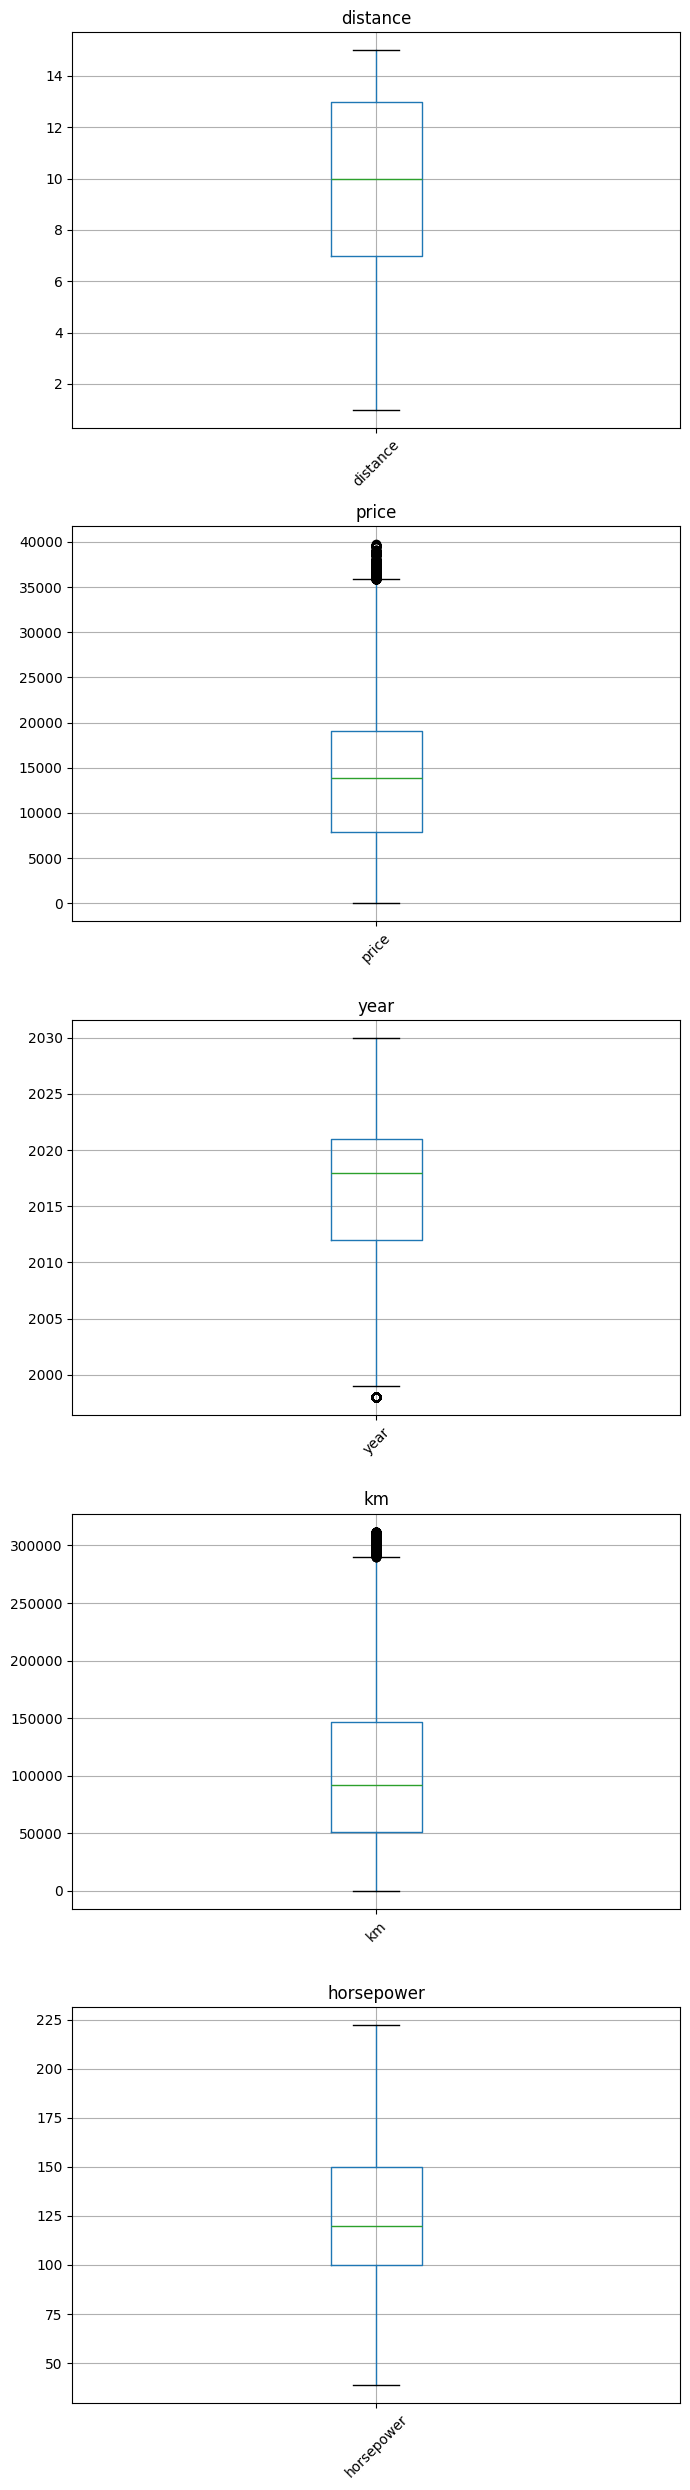

In [33]:
import matplotlib.pyplot as plt

# Definir el tamaño de la figura y el número de columnas
fig, axes = plt.subplots(nrows=len(df_numericas_sin_outliers.columns), ncols=1, figsize=(7, len(df_numericas_sin_outliers.columns) * 5))

# Iterar sobre cada columna y generar un boxplot
for ax, column in zip(axes, df_numericas_sin_outliers.columns):
    df_numericas_sin_outliers.boxplot(column=column, ax=ax)
    ax.set_title(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


C:\Users\marco\AppData\Local\Temp\ipykernel_13084\199945678.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\marco\AppData\Local\Temp\ipykernel_13084\199945678.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\marco\AppData\Local\Temp\ipykernel_13084\199945678.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\marco\AppData\Local\Temp\ipykernel_13084\199945678.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=

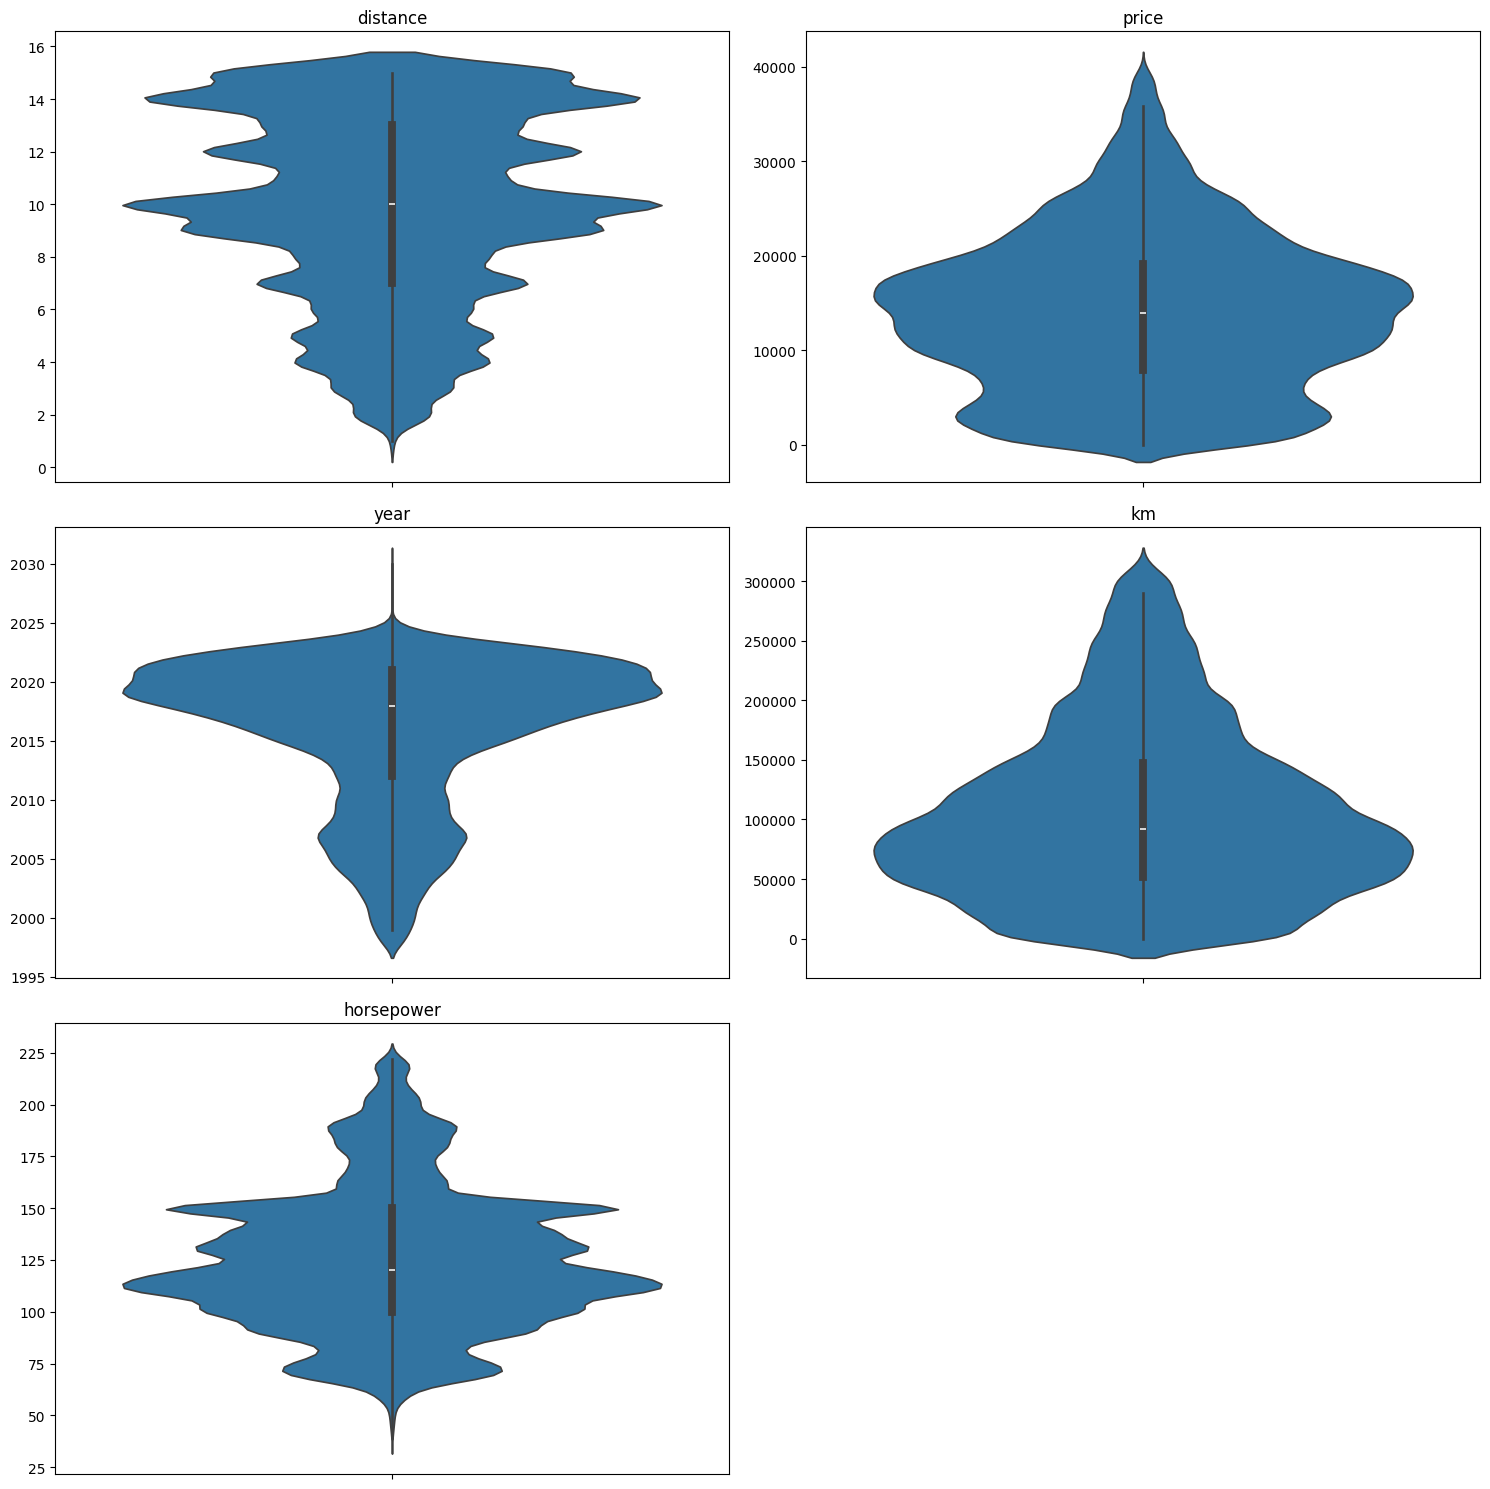

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir el tamaño de la figura y el número de columnas
num_cols = 2
num_rows = (len(df_numericas_sin_outliers.columns) + 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

# Iterar sobre cada columna y generar un violin plot en vertical
for ax, column in zip(axes.flat, df_numericas_sin_outliers.columns):
    sns.violinplot(y=df_numericas_sin_outliers[column], ax=ax)
    ax.set_title(column)
    ax.set_ylabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Eliminar cualquier subplot vacío si el número de columnas no es múltiplo de 2
for i in range(len(df_numericas_sin_outliers.columns), num_rows * num_cols):
    fig.delaxes(axes.flat[i])

plt.tight_layout()
plt.show()

In [23]:
# Crear la matriz de correlación para las columnas numéricas
matriz_correlacion = df_numericas_sin_outliers.corr()

# Mostrar la matriz de correlación
matriz_correlacion


,distance,price,year,km,horsepower
distance,1.000000,-0.002294,0.003359,-0.011032,-0.014212
price,-0.002294,1.000000,0.667212,-0.472941,0.466758
year,0.003359,0.667212,1.000000,-0.629048,0.091279
km,-0.011032,-0.472941,-0.629048,1.000000,0.022289
horsepower,-0.014212,0.466758,0.091279,0.022289,1.000000


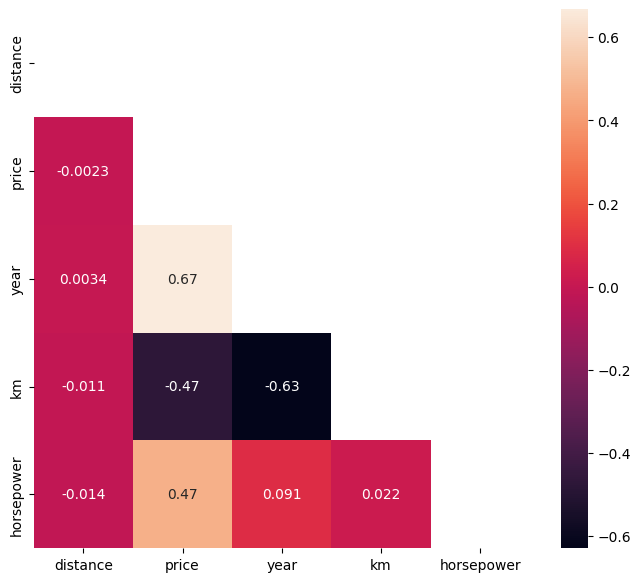

In [27]:
mask = np.zeros_like(df_numericas_sin_outliers.corr())
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(8, 7))
ax = sns.heatmap(df_numericas_sin_outliers.corr(), mask=mask, annot=True)
plt.show()

In [28]:
sns.histplot(df['price'])

<Axes: xlabel='price', ylabel='Count'>

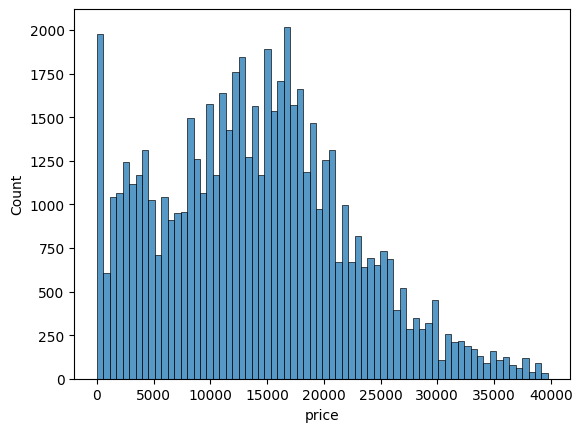

In [24]:
# comprobación de la distribución de precios
sns.histplot(df_iqr_cleaned['price'])

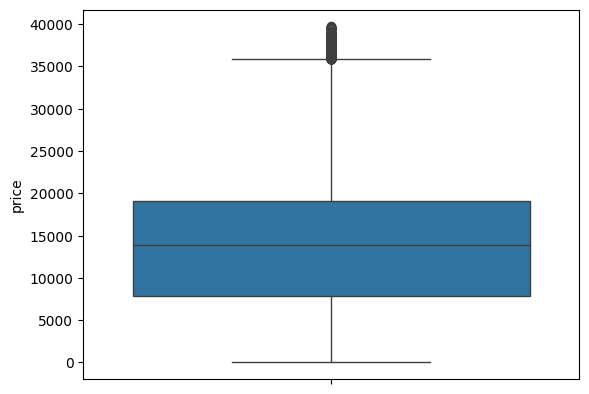

In [26]:
sns.boxplot(df_numericas_sin_outliers['price'])
plt.show()

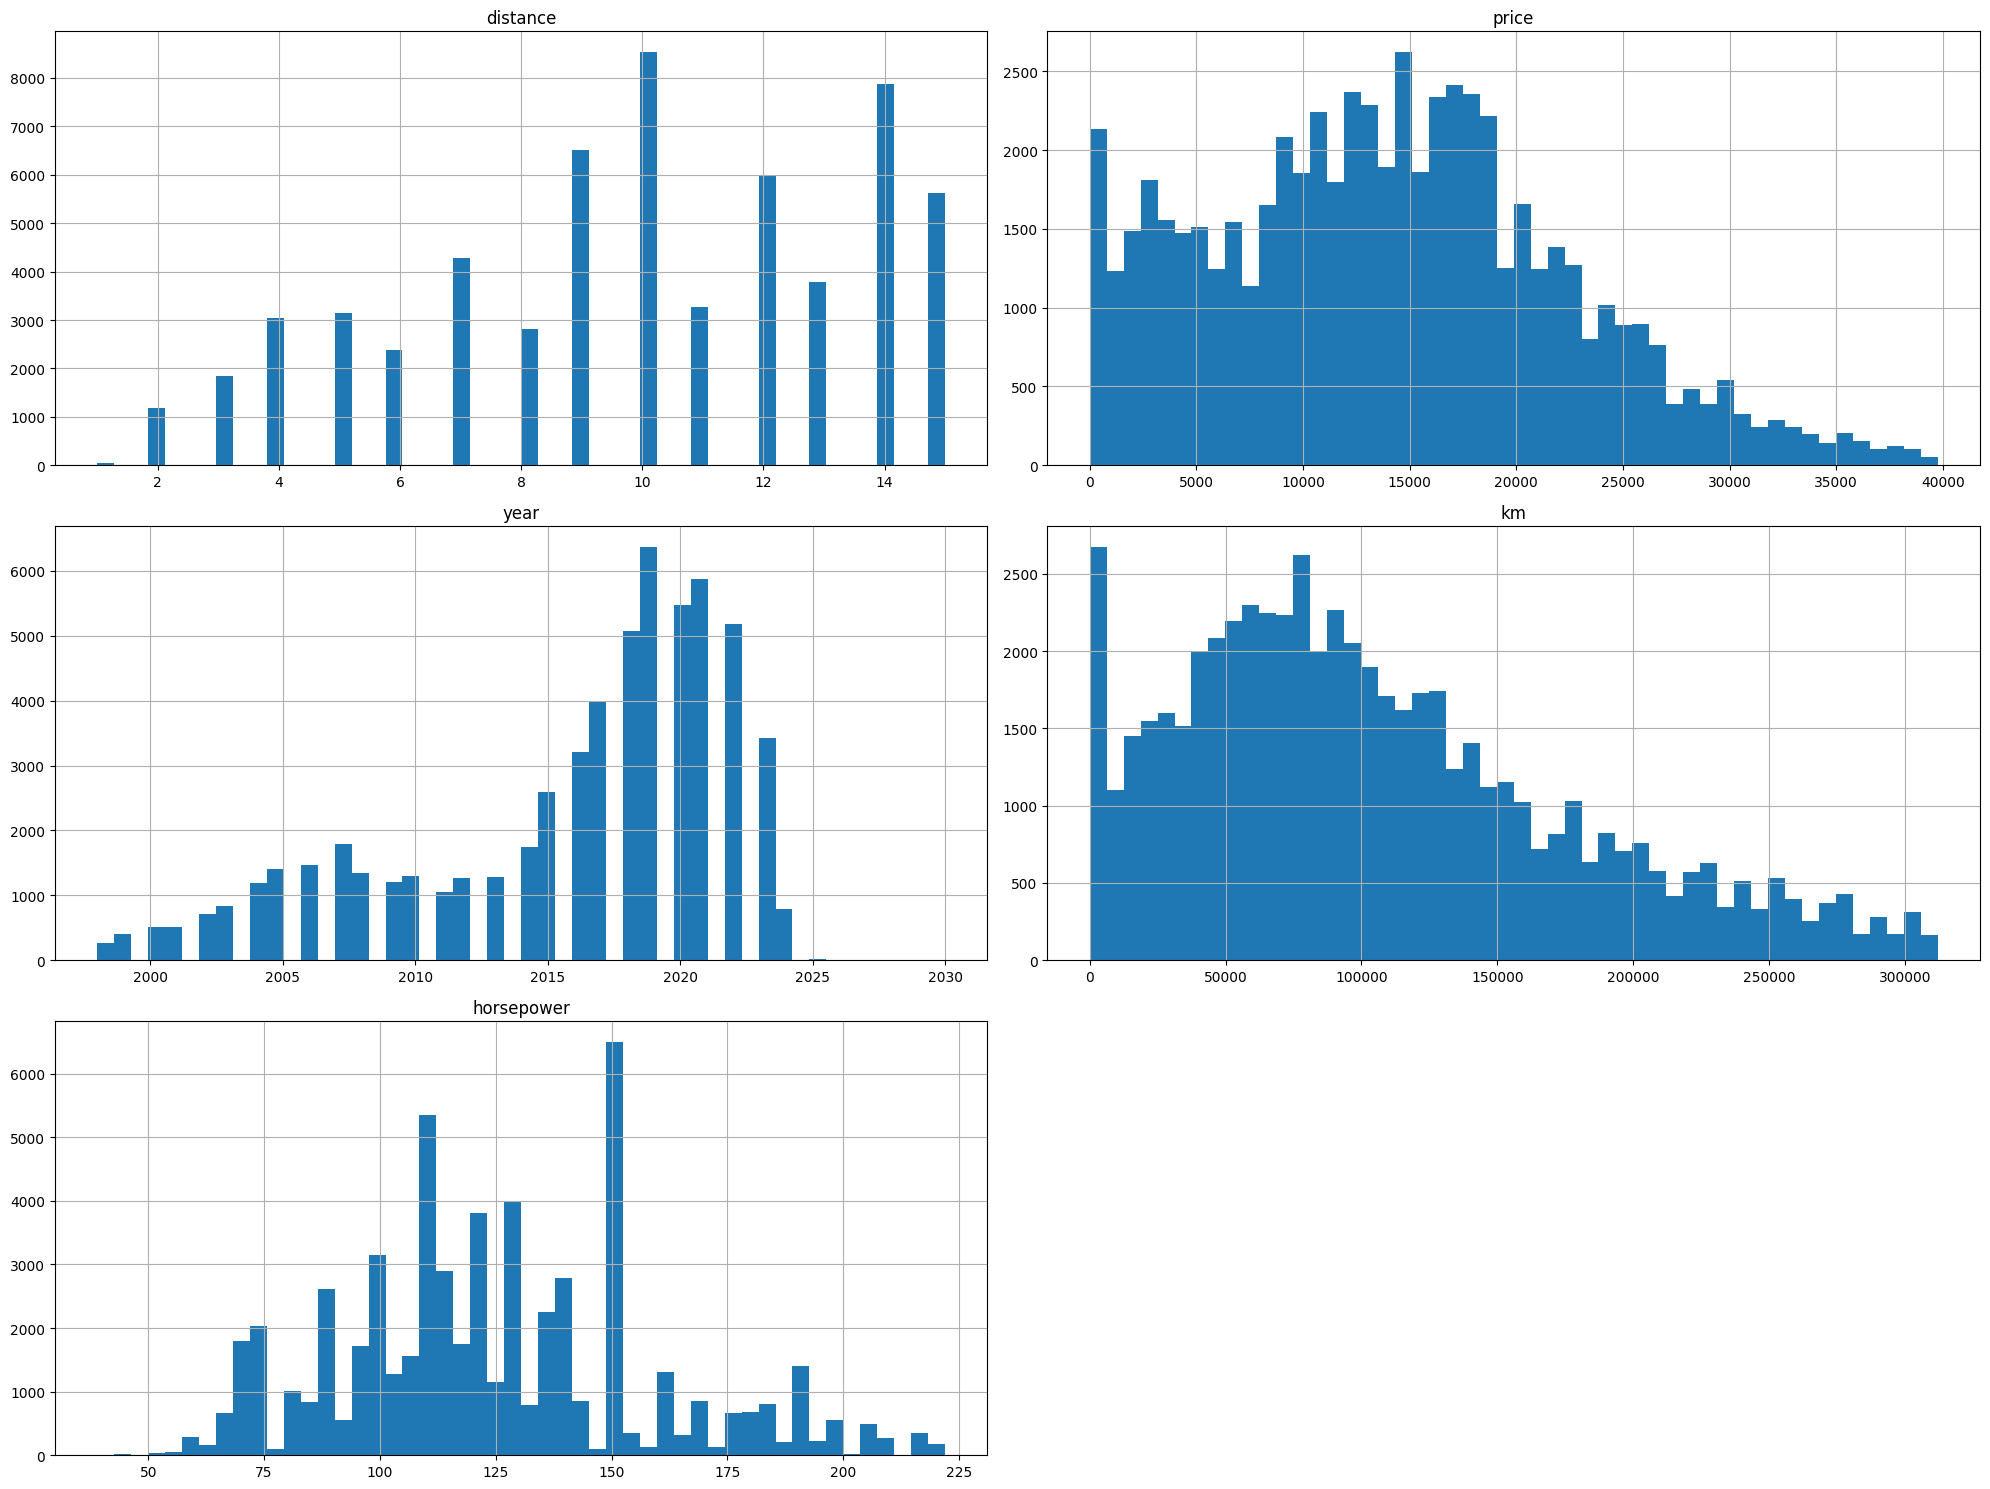

In [27]:
df_numericas_sin_outliers.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()



TypeError: 'method' object is not subscriptable

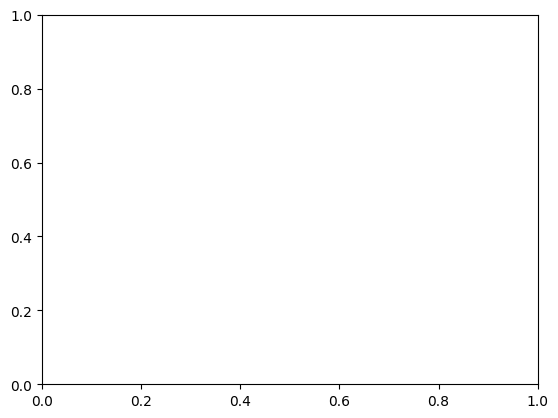

In [28]:
# Número de columnas para la cuadrícula
num_columns = 3
num_plots = len(df_numericas.columns)
num_rows = (num_plots + num_columns - 1) // num_columns  # Calcular el número de filas necesarias

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

for i, column in enumerate(df_numericas.columns):
    sns.histplot(df_numericas[column], ax=axes[i], kde=False, color='darkblue')
    axes[i].set_title(column)


plt.tight_layout()
plt.show()


In [ ]:
df_categorical= df.select_dtypes(exclude = 'number')
df_categorical.head()

,content_id,title,user_id,flag_reserved,flag_bumped,flag_country_bumped,currency,brand,model,version,engine,gearbox,creation_date,modification_date,location.city,location.postal_code,location.country_code
0,mzn205xy1kzn,Ford Kuga 1.5 TDCI 120 CV 4x2 A-S-S TITANIUM 2018,08z88grd38z3,False,True,True,EUR,Ford,Kuga,1.5 TDCi 120 Titanium 5p S/S,Diésel,manual,31-07-2024,31-07-2024,Chiclana de la Frontera,11130,ES
1,p614qm1lr265,Autocaravana Mobilvetta Icaro s12,9nz089kgvv6o,True,True,True,EUR,Fiat,Ducato,Ch. Cab. 18 2.8 JTD 146 Largo 2p,Diésel,manual,23-07-2024,23-07-2024,Fuente del Gallo,11149,ES
2,pzp2gegk1mj3,Peugeot 308 2019,08z8rvd0m8j3,False,True,False,EUR,Peugeot,308,SW 1.5 BlueHDi 100 Style 5p S/S,Diésel,manual,01-07-2024,01-07-2024,Chiclana de la Frontera,11130,ES
3,vjrq4ppo59zk,Renault Clio 2018,08z8rvd0m8j3,False,True,False,EUR,Renault,Clio,1.5 dCi 75 Life Energy 5p S/S,Diésel,manual,29-05-2024,29-05-2024,Chiclana de la Frontera,11130,ES
4,p6145dgne765,Peugeot 3008 2019,08z8rvd0m8j3,False,True,False,EUR,Peugeot,3008,1.5 BlueHDi 130 Active 5p S/S EAT8,Diésel,manual,31-05-2024,31-05-2024,Chiclana de la Frontera,11130,ES


In [ ]:
# Número de columnas para la cuadrícula
num_columns = 3
num_plots = len(df_numericas.columns)
num_rows = (num_plots + num_columns - 1) // num_columns  # Calcular el número de filas necesarias

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

for i, column in enumerate(df_numericas.columns):
    sns.histplot(df_numericas[column], ax=axes[i], kde=False, color='darkblue')
    axes[i].set_title(column)


plt.tight_layout()
plt.show()


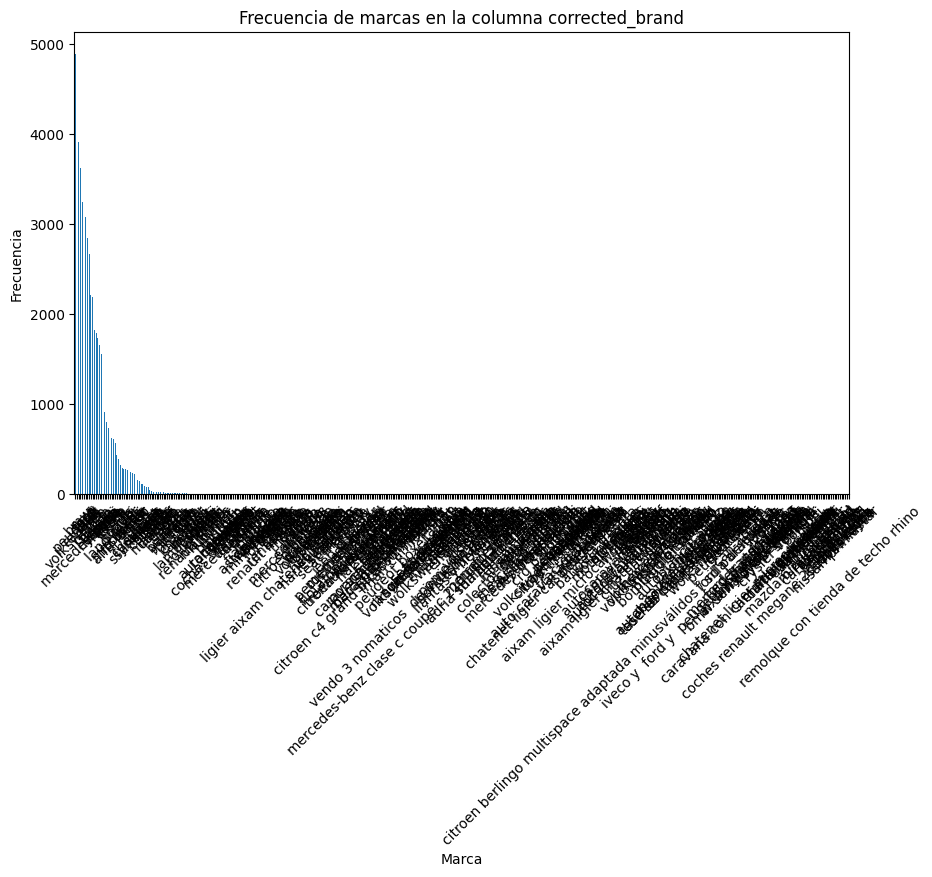

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df es tu DataFrame y corrected_brand es la columna de interés
# df = pd.read_csv('tu_archivo.csv') # si necesitas cargar el DataFrame desde un archivo

# Contar la frecuencia de cada marca
brand_counts = df['corrected_brand'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar')
plt.title('Frecuencia de marcas en la columna corrected_brand')
plt.xlabel('Marca')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar etiquetas de marcas para que se vean mejor
plt.show()


In [ ]:
nan_engine_rows = df[df['engine'].isna()]

In [ ]:
nan_engine_storytelling = nan_engine_rows[['engine', 'storytelling']]
nan_engine_storytelling

,engine,storytelling
97,None,Gestion de venta - Se le cubrira 3 meses de ga...
162,None,Motor kzt 3.0 swap bomba trabalhada \ninjetore...
281,None,*** Precio al contado: 26.990€ *** Precio alte...
283,None,*** Precio al contado: 22.990€ *** Precio alte...
287,None,*** Precio al contado: 33.990€ *** Precio alte...
...,...,...
56381,None,Se vende mercedes e280 gasolina carrocería w21...
56387,None,"Perfecto estado, todos los extras.Bixenon, cue..."
56393,None,Sin itv\nCon gancho de remolque
56404,None,Hola vendo este coche va perfecto 👌 de motor g...


In [ ]:
# Función para extraer el tipo de motor
def extract_engine(text):
    if 'gasolina' in text:
        return 'gasolina'
    elif 'diésel' in text:
        return 'diésel'
    elif 'eléctrico' in text:
        return 'eléctrico'
    else:
        return None



In [ ]:
# Aplicar la función al DataFrame
nan_engine_storytelling2 = nan_engine_storytelling['storytelling'].apply(extract_engine)

In [ ]:
nan_engine_storytelling2

97           None
162          None
281          None
283          None
287          None
           ...   
56381    gasolina
56387        None
56393        None
56404        None
56405        None
Name: storytelling, Length: 4816, dtype: object

In [ ]:
nan_engine_storytelling2.isnull().sum()

4472

In [ ]:
# df['engine'].unique()..

df['engine']

In [ ]:
# Ajustar la configuración de pandas para mostrar más caracteres en cada celda
pd.set_option('display.max_colwidth', None)

# Mostrar las primeras filas de la columna 'engine' con la nueva configuración
print(df['engine'].head())


In [ ]:
# Voy a ver si hay valores duplicados:

df.duplicated().any() # No hay valores duplicados